In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate audio scene observation model

In [22]:
scene_labels = ['campus','courtyard','lab','lobby']
audio_obs_labels = ['airport', 'bus', 'metro', 'metro_station', 'park', 'public_square', 'shopping_mall', 'street_pedestrian', 'street_traffic', 'tram']
cpjku_scene_obs_model_arr = json.load(open('../../results/exp0_obs_models/cpjku_audio_scene_obs_model.json'))

audio_model_df = pd.DataFrame(cpjku_scene_obs_model_arr,columns=audio_obs_labels,index=scene_labels)
audio_model_df.style.set_caption("Audio model")
audio_model_df

,airport,bus,metro,metro_station,park,public_square,shopping_mall,street_pedestrian,street_traffic,tram
campus,7.0,16.0,48.0,21.0,190.0,6.0,0.0,0.0,43.0,1947.0
courtyard,3.0,304.0,4.0,7.0,764.0,0.0,0.0,1.0,21.0,1361.0
lab,21.0,155.0,2124.0,32.0,78.0,1.0,0.0,1.0,65.0,20.0
lobby,458.0,46.0,207.0,474.0,970.0,0.0,69.0,18.0,22.0,178.0


# Generate CLIP scene observation models

In [58]:
clip_scene_obs_model_dict = json.load(open('../../results/exp0_obs_models/clip_scene_obs_model.json'))

clip_obs_results_df = pd.DataFrame(np.zeros((6,9)),index=clip_scene_obs_model_dict.keys(),columns=['acc','p_campus','r_campus','p_crtyrd','r_crtyrd','p_lab','r_lab','p_lobby','r_lobby'])

In [78]:
row_labels = ['campus_actual','courtyard_actual','lab_actual','lobby_actual']
col_labels = ['campus_est','courtyard_est','lab_est','lobby_est']

for clip_cfg in clip_scene_obs_model_dict.keys():
    print(clip_cfg)
    model_df = pd.DataFrame(clip_scene_obs_model_dict[clip_cfg]['model'], index=row_labels, columns=col_labels)
    print(model_df)

    acc = float(np.diagonal(clip_scene_obs_model_dict[clip_cfg]['model']).sum()/np.array(clip_scene_obs_model_dict[clip_cfg]['model']).sum())
    p_campus = float(np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[0,0].sum()/np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[:,0].sum())
    r_campus = float(np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[0,0].sum()/np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[0,:].sum())
    p_crtyrd = float(np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[1,1].sum()/np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[:,1].sum())
    r_crtyrd = float(np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[1,1].sum()/np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[1,:].sum())
    p_lab = float(np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[2,2].sum()/np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[:,2].sum())
    r_lab = float(np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[2,2].sum()/np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[2,:].sum())
    p_lobby = float(np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[3,3].sum()/np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[:,3].sum())
    r_lobby = float(np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[3,3].sum()/np.array(clip_scene_obs_model_dict[clip_cfg]['model'])[3,:].sum())

    clip_obs_results_df.at[clip_cfg,'acc'] = acc
    clip_obs_results_df.at[clip_cfg,'p_campus'] = p_campus
    clip_obs_results_df.at[clip_cfg,'r_campus'] = r_campus
    clip_obs_results_df.at[clip_cfg,'p_crtyrd'] = p_crtyrd
    clip_obs_results_df.at[clip_cfg,'r_crtyrd'] = r_crtyrd
    clip_obs_results_df.at[clip_cfg,'p_lab'] = p_lab
    clip_obs_results_df.at[clip_cfg,'r_lab'] = r_lab
    clip_obs_results_df.at[clip_cfg,'p_lobby'] = p_lobby
    clip_obs_results_df.at[clip_cfg,'r_lobby'] = r_lobby
    print()


RN50_basic_description
                  campus_est  courtyard_est  lab_est  lobby_est
campus_actual        38610.0            1.0     41.0        0.0
courtyard_actual     42864.0           35.0      8.0        0.0
lab_actual             773.0            0.0  41409.0       10.0
lobby_actual          4693.0            0.0      1.0    36745.0

RN50_social_in_out_desc
                  campus_est  courtyard_est  lab_est  lobby_est
campus_actual        36047.0           16.0      0.0     2589.0
courtyard_actual     38061.0         4319.0      0.0      527.0
lab_actual               0.0            0.0  41490.0      702.0
lobby_actual             0.0            0.0     40.0    41399.0

ViT-B/32_basic_description
                  campus_est  courtyard_est  lab_est  lobby_est
campus_actual        31512.0          296.0   4306.0     2538.0
courtyard_actual     25070.0         6161.0  11536.0      140.0
lab_actual               0.0            0.0  38289.0     3903.0
lobby_actual             0.0

In [79]:
clip_obs_results_df

,acc,p_campus,r_campus,p_crtyrd,r_crtyrd,p_lab,r_lab,p_lobby,r_lobby
RN50_basic_description,0.707059,0.444099,0.998913,0.972222,0.000816,0.998794,0.981442,0.999728,0.886725
RN50_social_in_out_desc,0.746141,0.486412,0.932604,0.996309,0.100660,0.999037,0.983362,0.915563,0.999035
ViT-B/32_basic_description,0.710703,0.556926,0.815275,0.954158,0.143590,0.707340,0.907494,0.862953,1.000000
ViT-B/32_social_in_out_desc,0.557431,1.000000,0.016429,0.530207,1.000000,0.545949,1.000000,1.000000,0.153189
ViT-L/14_basic_description,0.728646,0.489153,0.987038,0.717157,0.057380,0.975279,0.928494,0.930772,0.979198
ViT-L/14_social_in_out_desc,0.947237,0.995681,0.912527,0.925371,0.996434,0.895268,0.993767,0.994283,0.881295


# Compute CLIP role recognition model

In [25]:
actual_role_labels = ['pedestrian','supervisor','teammate'] # rows
est_role_labels = ['pedestrian','teammate','supervisor'] # columns
ped_tru_pos_idx = [actual_role_labels.index('pedestrian'),est_role_labels.index('pedestrian')]
teammate_tru_pos_idx = [actual_role_labels.index('teammate'),est_role_labels.index('teammate')]
sup_tru_pos_idx = [actual_role_labels.index('supervisor'),est_role_labels.index('supervisor')]
print(ped_tru_pos_idx)
print(teammate_tru_pos_idx)
print(sup_tru_pos_idx)


clip_role_obs_model_dict = json.load(open('../../results/exp0_obs_models/clip_role_obs_model.json'))


for cfg_key in clip_role_obs_model_dict.keys():
    print(cfg_key)

    model_array = np.array(clip_role_obs_model_dict[cfg_key]['model'])
    print(model_array)

    n_total_obs = model_array.sum()
    
    ped_true_pos = model_array[ped_tru_pos_idx[0],ped_tru_pos_idx[1]]
    teammate_true_pos = model_array[teammate_tru_pos_idx[0],teammate_tru_pos_idx[1]]
    sup_true_pos = model_array[sup_tru_pos_idx[0],sup_tru_pos_idx[1]]
    n_true_pos = ped_true_pos + teammate_true_pos + sup_true_pos

    acc = float(n_true_pos/n_total_obs)

    p_ped = float(ped_true_pos/model_array[:,est_role_labels.index('pedestrian')].sum())
    r_ped = float(ped_true_pos/model_array[actual_role_labels.index('pedestrian'),:].sum())
    p_team = float(teammate_true_pos/model_array[:,est_role_labels.index('teammate')].sum())
    r_team = float(teammate_true_pos/model_array[actual_role_labels.index('teammate'),:].sum())
    p_sup = float(sup_true_pos/model_array[:,est_role_labels.index('supervisor')].sum())
    r_sup = float(sup_true_pos/model_array[actual_role_labels.index('supervisor'),:].sum())
                  
    print("Accuracy: %s" % acc)
    print("Pedestrian precision %.2f, recall %.2f" % (p_ped, r_ped))
    print("Teammate precision %.2f, recall %.2f" % (p_team, r_team))
    print("Supervisor precision %.2f, recall %.2f" % (p_sup, r_sup))
    print()
    

# clip_role_model_df = pd.DataFrame(clip_role_obs_model_arr)
# clip_role_model_df.style.set_caption("CLIP role recognition observation model")
# clip_role_model_df

[0, 0]
[2, 1]
[1, 2]
RN50_basic_description
[[6.9320e+03 3.8919e+04 4.7720e+03]
 [2.0000e+00 3.9000e+01 4.9718e+04]
 [3.6700e+02 5.1274e+04 1.9800e+02]]
Accuracy: 0.7089954736862851
Pedestrian precision 0.95, recall 0.14
Teammate precision 0.57, recall 0.99
Supervisor precision 0.91, recall 1.00

RN50_detailed_description
[[2.5483e+04 2.5115e+04 2.5000e+01]
 [8.3000e+01 1.2300e+02 4.9553e+04]
 [4.9600e+02 5.1339e+04 4.0000e+00]]
Accuracy: 0.8302073958258059
Pedestrian precision 0.98, recall 0.50
Teammate precision 0.67, recall 0.99
Supervisor precision 1.00, recall 1.00

ViT-B/32_basic_description
[[1.9760e+04 3.0092e+04 7.7100e+02]
 [1.2100e+02 3.0200e+03 4.6618e+04]
 [2.7000e+01 5.1802e+04 1.0000e+01]]
Accuracy: 0.7763711971409989
Pedestrian precision 0.99, recall 0.39
Teammate precision 0.61, recall 1.00
Supervisor precision 0.98, recall 0.94

ViT-B/32_detailed_description
[[2.7194e+04 2.0923e+04 2.5060e+03]
 [0.0000e+00 0.0000e+00 4.9759e+04]
 [1.4000e+01 4.7917e+04 3.9080e+03]]
Ac

## Inference Times

RN50_basic_description: 0.0231 mean, 0.1818 max
RN50_detailed_description: 0.0229 mean, 0.0377 max
ViT-B/32_basic_description: 0.0239 mean, 0.0385 max
ViT-B/32_detailed_description: 0.0239 mean, 0.0456 max
ViT-L/14_basic_description: 0.0377 mean, 0.0547 max
ViT-L/14_detailed_description: 0.0377 mean, 0.0559 max


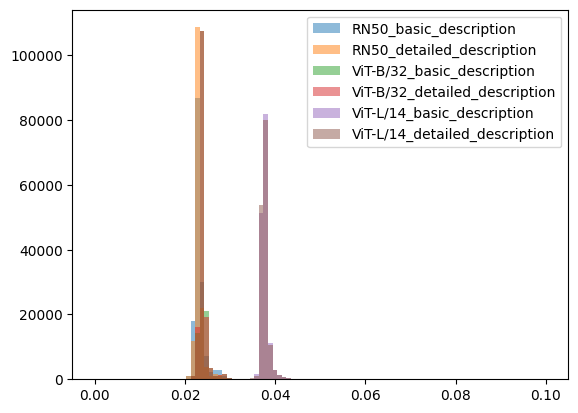

In [35]:
clip_role_obs_model_dict = json.load(open('../../results/exp0_obs_models/clip_role_obs_model.json'))

# Plot parameters
bins = np.linspace(0,.1,100)

for cfg_key in clip_role_obs_model_dict.keys():
    # print(cfg_key)

    times = np.array(clip_role_obs_model_dict[cfg_key]['times'])
    t_mean = np.mean(times[1:])
    t_max = np.max(times[1:])
    print("%s: %.4f mean, %.4f max" % (cfg_key, t_mean, t_max))

    plt.hist(times, bins, alpha=0.5, label=cfg_key)
    plt.legend(loc='upper right')

plt.show()

# Compute CLIP gesture recognition obs models

In [47]:
clip_gest_obs_model_dict = json.load(open('../../results/exp0_obs_models/clip_gesture_obs_model.json'))

basic_description =  ['a person holding something', 'person with arms at their sides','person with one arm in front','person with two arms in front','person with palms facing away from camera','person with palms facing toward camera','person with straight arms', 'person with arm overhead','person waving','person making pushing motion']
detailed_description = ['a person who is not making any gesture and is standing or walking normally','a person making an unknown gesture or motion','a picture of a person with their right arm fully extended in front of them','a person waving their right hand above their head, arm bent','a person with one arm bent in front of them, palm facing backwards','a person with their right arm raised vertically above their head, palm facing in front', 'a picture of a person with both arms bent in front of them, both palms facing backwards','a picture of a person with both arms bent in front of them, both palms facing forwards','a picture of a person with their right arm fully extended above their head, at an angle, with palm facing forward']
gest_labels = ['null','other','advance','attention','follow-me','halt','move-forward','move-in-reverse','rally']

for clip_model in clip_gest_obs_model_dict.keys():
    print(clip_model)
    # print(clip_gest_obs_model_dict[clip_model].keys()) # model, times
    # print(clip_gest_obs_model_dict[clip_model]['model'].keys()) # 'campus', 'courtyard', 'lab', 'lobby', 'overall'
    # print(clip_gest_obs_model_dict[clip_model]['times'].keys())
    for scene in clip_gest_obs_model_dict[clip_model]['model'].keys():
        print(scene)
        gest_obs_model_df = pd.DataFrame(clip_gest_obs_model_dict[clip_model]['model'][scene],index=gest_labels)
        print(gest_obs_model_df)
    
    
    print()

RN50_basic_description
campus
                      0    1       2       3      4    5      6     7    8  \
null               65.0  3.0  6705.0  1051.0    2.0  6.0  314.0   0.0  0.0   
other            2509.0  3.0  5128.0   442.0  109.0  0.0   19.0   7.0  0.0   
advance            84.0  0.0  2377.0   213.0   13.0  4.0   62.0  32.0  0.0   
attention          20.0  1.0  2597.0   160.0    0.0  1.0    1.0   0.0  7.0   
follow-me         217.0  0.0  2314.0   186.0   69.0  2.0    0.0   0.0  0.0   
halt               47.0  1.0  2601.0    88.0    0.0  0.0   24.0   1.0  0.0   
move-forward      226.0  1.0  1860.0   589.0   34.0  1.0  107.0   0.0  0.0   
move-in-reverse   238.0  1.0  1677.0   473.0   79.0  3.0  323.0   1.0  0.0   
rally              12.0  0.0  2660.0    95.0    3.0  0.0    3.0   0.0  1.0   

                   9  
null             0.0  
other            0.0  
advance          0.0  
attention        0.0  
follow-me        0.0  
halt             0.0  
move-forward     0.0  
move-

## Inference times

ViT-L/14_detailed_description: 0.0247 mean, 0.1076 max
ViT-L/14_detailed_description: 0.0246 mean, 0.0666 max
ViT-L/14_detailed_description: 0.0252 mean, 0.0447 max
ViT-L/14_detailed_description: 0.0251 mean, 0.0383 max
ViT-L/14_detailed_description: 0.0439 mean, 0.0584 max
ViT-L/14_detailed_description: 0.0430 mean, 0.0603 max


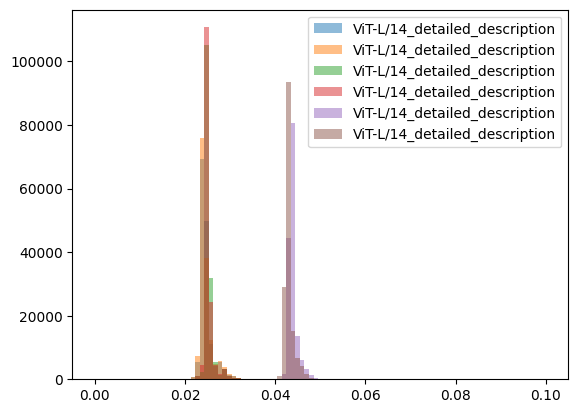

In [46]:
# Plot parameters
bins = np.linspace(0,.1,100)

for clip_model in clip_gest_obs_model_dict.keys():
    times = np.array(clip_gest_obs_model_dict[clip_model]['times']['overall'])
    t_mean = np.mean(times[1:])
    t_max = np.max(times[1:])
    print("%s: %.4f mean, %.4f max" % (cfg_key, t_mean, t_max))

    plt.hist(times, bins, alpha=0.5, label=cfg_key)
    plt.legend(loc='upper right')

plt.show()